In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
plt.style.use('fivethirtyeight')

In [2]:
results = pd.read_csv('epl2020.csv')

In [3]:
results_df = results[['teamId', 'xG', 'npxG', 'xGA', 'scored', 'missed', 'xpts', 'pts']]
results_df['xG_diff'] = results['scored'] - results['xG']
results_df['npxG_diff'] = results['scored'] - results['npxG']
results_df['xGA_diff'] = results['missed'] - results['xGA']
results_df['xP_diff'] = results['pts'] - results['xpts']

expected_goals = results_df['xG']
expected_goals_against = results_df['xGA']
goals = results_df['scored']
goals_against = results_df['missed']
expected_points = results_df['xpts']
points = results_df['pts']
xG_diff = results_df['xG_diff']
xP_diff = results_df['xP_diff']

/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/troyramsey/opt/anaconda3/envs/UODataClass/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value 

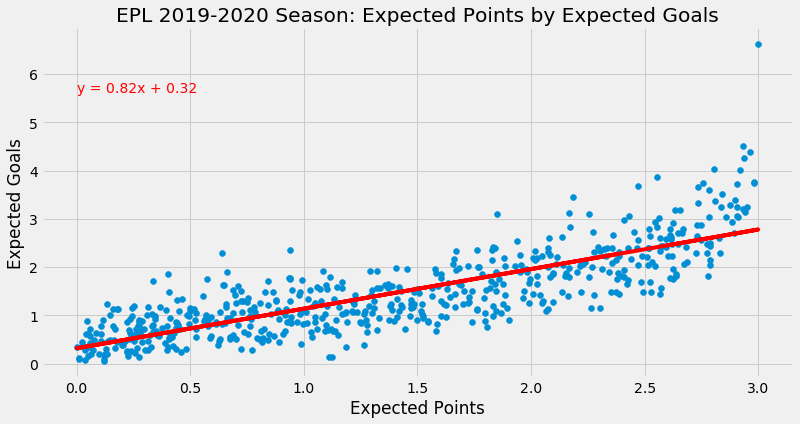

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(expected_points, expected_goals)
plt.title('EPL 2019-2020 Season: Expected Points by Expected Goals')
plt.xlabel('Expected Points')
plt.ylabel('Expected Goals')

(slope, intercept, rvalue, pvalue, stderr) = linregress(expected_points, expected_goals)
regress_values = expected_points * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(expected_points, regress_values, "r-", alpha=1)
plt.annotate(line_eq, (expected_points.min(), expected_goals.max() - 1), fontsize=14,color="red")

path = f'../visualizations/xp_xg_scatter.png'
plt.savefig(path, format='png')

plt.show()    

In [5]:
result_groups = results_df.groupby('teamId')
xG_plot_df = pd.DataFrame(result_groups.mean().sort_values('xG_diff', ascending=False)).reset_index()

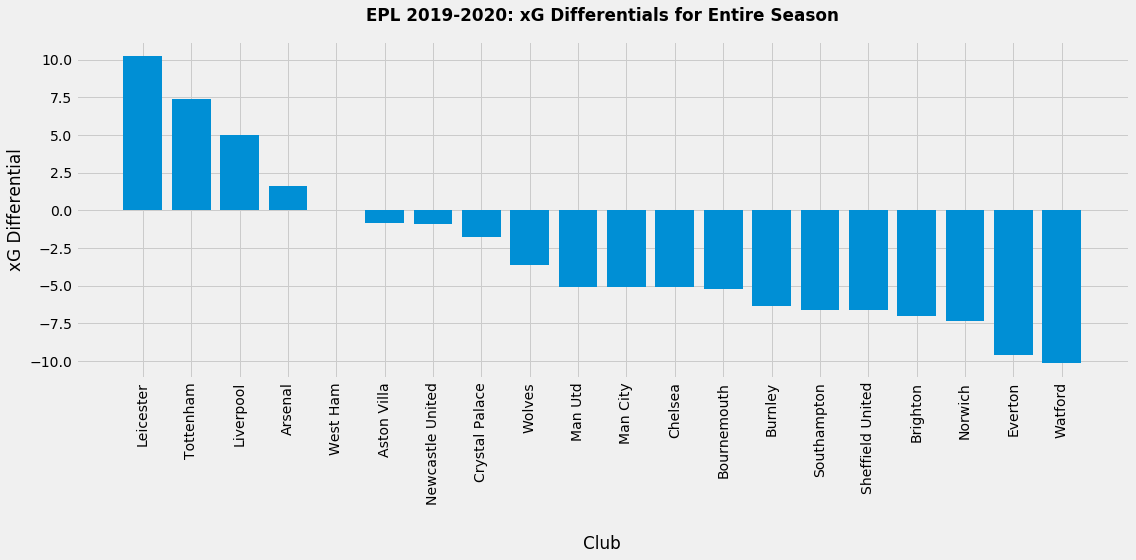

In [6]:
total_xG_diff = pd.DataFrame(result_groups.sum().sort_values('xG_diff', ascending=False)).reset_index()

plt.figure(figsize=(16,8))
plt.bar(total_xG_diff['teamId'], total_xG_diff['xG_diff'])
plt.xticks(rotation=90)
plt.title('EPL 2019-2020: xG Differentials for Entire Season', fontweight='bold', fontsize='large', pad=20)
plt.xlabel('Club', labelpad=30, fontsize='large')
plt.ylabel('xG Differential', fontsize='large')
plt.tight_layout()

path = f'../visualizations/xg_diff_bar.png'
plt.savefig(path, format='png', facecolor='#ebecf1')

plt.show()

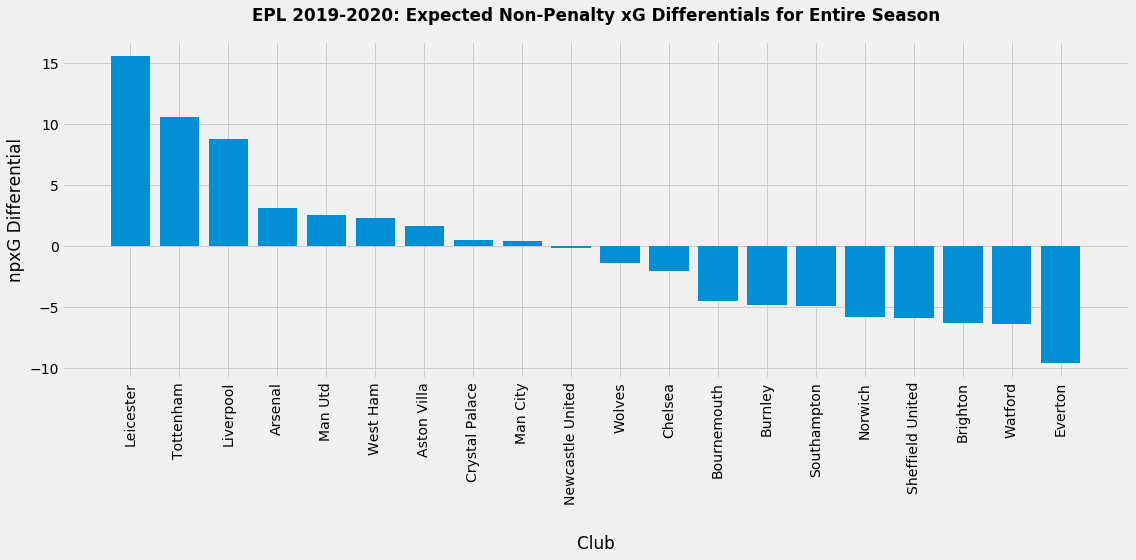

In [7]:
total_npxG_diff = pd.DataFrame(result_groups.sum().sort_values('npxG_diff', ascending=False)).reset_index()

plt.figure(figsize=(16,8))
plt.bar(total_npxG_diff['teamId'], total_npxG_diff['npxG_diff'])
plt.xticks(rotation=90)
plt.title('EPL 2019-2020: Expected Non-Penalty xG Differentials for Entire Season', fontweight='bold', fontsize='large', pad=20)
plt.xlabel('Club', labelpad=30, fontsize='large')
plt.ylabel('npxG Differential', fontsize='large')
plt.tight_layout()

path = f'../visualizations/npxg_diff_bar.png'
plt.savefig(path, format='png', facecolor='#ebecf1')

plt.show()

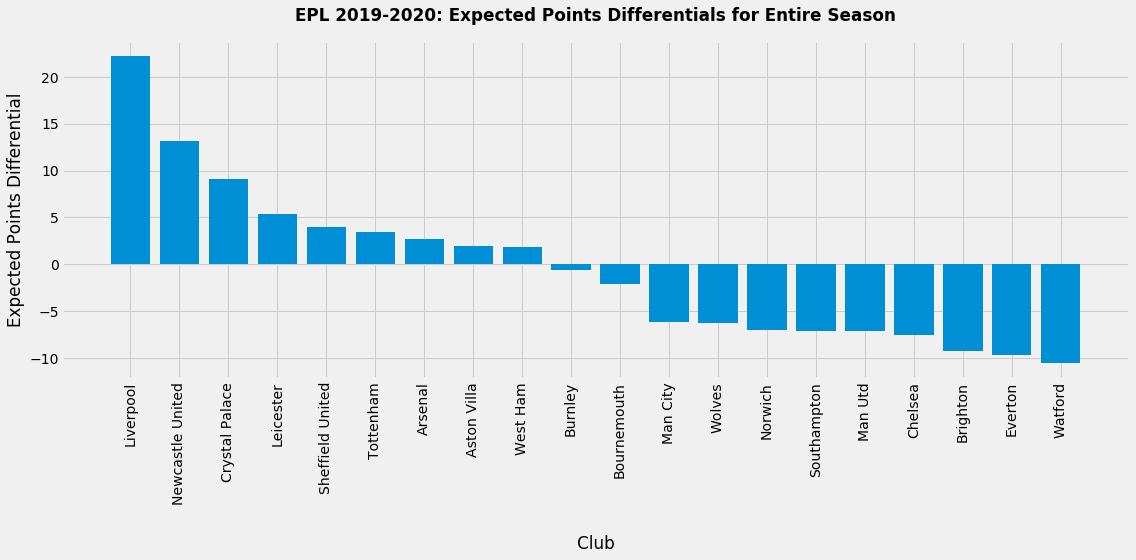

In [8]:
total_xP_diff = pd.DataFrame(result_groups.sum().sort_values('xP_diff', ascending=False)).reset_index()

plt.figure(figsize=(16,8))
plt.bar(total_xP_diff['teamId'], total_xP_diff['xP_diff'])
plt.xticks(rotation=90)
plt.title('EPL 2019-2020: Expected Points Differentials for Entire Season', fontweight='bold', fontsize='large', pad=20)
plt.xlabel('Club', labelpad=30, fontsize='large')
plt.ylabel('Expected Points Differential', fontsize='large')
plt.tight_layout()

path = f'../visualizations/xp_diff_bar.png'
plt.savefig(path, format='png', facecolor='#ebecf1')

plt.show()

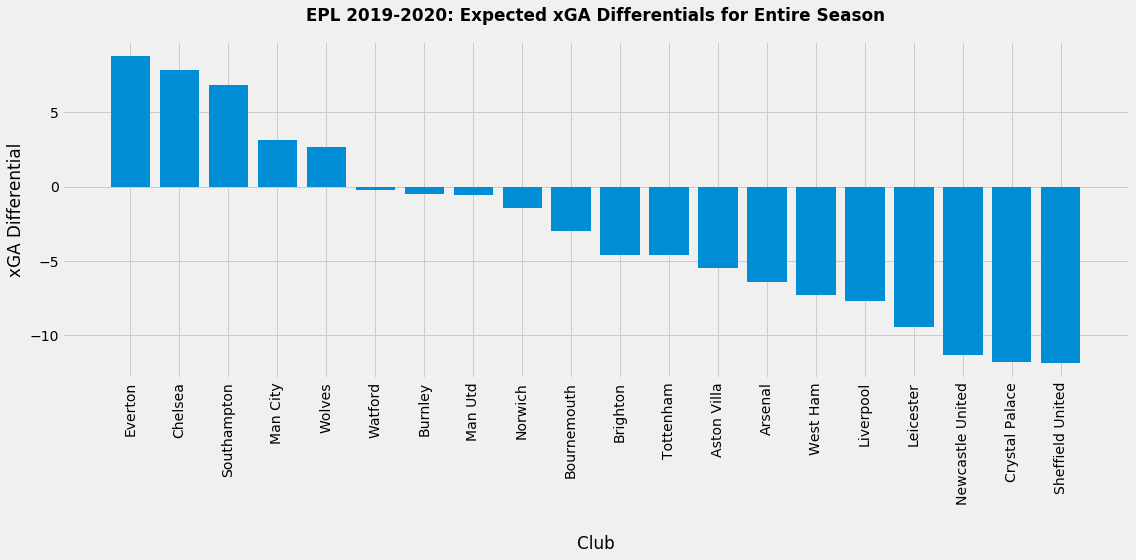

In [9]:
total_xGA_diff = pd.DataFrame(result_groups.sum().sort_values('xGA_diff', ascending=False)).reset_index()

plt.figure(figsize=(16,8))
plt.bar(total_xGA_diff['teamId'], total_xGA_diff['xGA_diff'])
plt.xticks(rotation=90)
plt.title('EPL 2019-2020: Expected xGA Differentials for Entire Season', fontweight='bold', fontsize='large', pad=20)
plt.xlabel('Club', labelpad=30, fontsize='large')
plt.ylabel('xGA Differential', fontsize='large')
plt.tight_layout()

path = f'../visualizations/xga_diff_bar.png'
plt.savefig(path, format='png', facecolor='#ebecf1')

plt.show()

In [10]:
results_df.to_html('results_df.html')